In [58]:
from pdrtpy.modelset import ModelSet
import numpy as np
from astropy.table import Table
import pdrtpy.pdrutils as utils
from pdrtpy.plot.lineratioplot import LineRatioPlot
from pdrtpy.tool.lineratiofit import LineRatioFit
from pdrtpy.plot.modelplot import ModelPlot
from pdrtpy.measurement import Measurement
from pdrtpy.modelset import ModelSet
from pdrtpy import version
from astropy.nddata import StdDevUncertainty
import astropy.units as u
from labellines import labelLine, labelLines
from lmfit import Model, Parameters, Minimizer, minimize, fit_report
import corner
%matplotlib inline

In [2]:
m = ModelSet(name="wk2006",z=1)

In [3]:
version()

'2.1.1'

In [4]:
m.table.show_in_notebook()

idx,numerator,denominator,ratio,filename,z,title
,,,,,,null
0,OI_145,OI_63,OI_145/OI_63,oioiweb,1.0,[O I] 145 $\mu$m / [O I] 63 $\mu$m
1,OI_145,CII_158,OI_145/CII_158,o145ciiweb,1.0,[O I] 145 $\mu$m / [C II] 158 $\mu$m
2,OI_63,CII_158,OI_63/CII_158,oicpweb,1.0,[O I] 63 $\mu$m / [C II] 158 $\mu$m
3,CII_158,CI_609,CII_158/CI_609,ciici609web,1.0,[C II] 158 $\mu$m / [C I] 609 $\mu$m
4,CI_370,CI_609,CI_370/CI_609,ciciweb,1.0,[C I] 370 $\mu$m / [C I] 609 $\mu$m
5,CII_158,CO_10,CII_158/CO_10,ciicoweb,1.0,[C II] 158 $\mu$m / CO(J=1-0)
6,CII_158,CO_32,CII_158/CO_32,ciico32web,1.0,[C II] 158 $\mu$m / CO(J=3-2)
7,CII_158,CO_65,CII_158/CO_65,CII158_CO65,1.0,[C II] 158 $\mu$m / CO(J=6-5)
8,CII_158,FIR,CII_158/FIR,CII158_FIR,1.0,[C II] 158 $\mu$m / I$_{FIR}$


In [5]:
mp = ModelPlot(m)
'H264Q11/H210S1' in m.table['ratio']

Habing


True

In [6]:
try:
    m.model_ratios(["CII_158"])
except Exception as e:
    print("caught exception properly:",e)

mz = m.get_model('CII_158/CI_609')
mz.data.max()

caught exception properly: m most contain at least two strings


7066.33

[[ 9.01887035  0.39307201]
 [44.43040085 19.76740074]]
[9.01887035]
[8.60261744]
[7066.33007812]


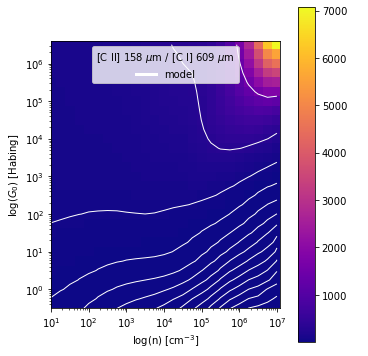

In [7]:
print(mz.get([3,1],[1,-.5],log=True))
print(mz.get(10,10**-.5,log=False))
mp.plot(mz.id)
mz.wcs
10**-.5
print(mz.get(1.1,-.45,log=True))
print(mz.get(1E7,10**6.5))
#print(mz[0,0])

In [8]:
mz.is_ratio()

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [9]:
# only residual not residual squared
def residual_single_pix(params,models,measurements):
    sum = 0.0
    parvals = params.valuesdict()
    
    mvalue = np.ones(len(models))
    dvalue = np.ones(len(measurements))
    evalue = np.ones(len(measurements))
    i=0
    for k in models:
        mvalue[i] = models[k].get(parvals['density'],parvals['radiation_field']) 
        dvalue[i] = measurements[k].value
        evalue[i] = measurements[k].error
        i = i+1
    return  (dvalue - mvalue)/evalue


In [10]:
try:
    m.get_models(['CII_158'],model_type='foo')
except ValueError as e:
    print("caught exception properly ",e)
x=m.get_models(["CI_609","FIR"],model_type="ratio")
y=m.get_models(["CI_609","FIR"],model_type="intensity")
z=m.get_models(["CI_609","FIR"],model_type="both")
q=m.get_models(['CII_158'],model_type='intensity')

caught exception properly  Unrecognized model_type: must be one of 'intensity', 'ratio', or 'both'


dict: {'CI_609': [1.5e-06] +/- 5e-07 erg / (cm2 s sr), 'CII_158/CI_609': [2] +/- 1 , 'OI_145': [3.e-06] +/- 1e-07 erg / (cm2 s sr), 'CII_158': [9.e-06] +/- 1e-06 erg / (cm2 s sr)}
<class 'pdrtpy.measurement.Measurement'>


1

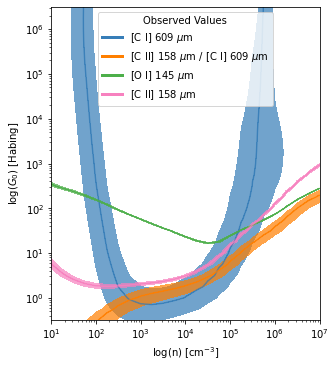

In [41]:
myunit = "erg s-1 cm-2 sr-1"
mx=Measurement(data=[1.5E-6],uncertainty = StdDevUncertainty(0.5E-6),identifier="CI_609",unit=myunit)
my=Measurement(data=[2],uncertainty = StdDevUncertainty(1),identifier="CII_158/CI_609",unit=u.dimensionless_unscaled)
mz=Measurement(data=[9E-6],uncertainty = StdDevUncertainty(1E-6),identifier="CII_158",unit=myunit)
mq=Measurement(data=[3E-6],uncertainty=StdDevUncertainty(1E-7),identifier="OI_145",unit=myunit)
a=[mx,my,mq,mz]
ids = [m.id for m in a]
d = dict(zip(ids,a))
print("dict:",d)
print(type(d["CI_609"]))
#d["CI_609"].levels
mp.overlay(a,shading=.71)
len(mx.data)
#q[1].id

In [67]:
myunit = "erg s-1 cm-2 sr-1" # my default unit for value and error
m1 = Measurement(data=6E-6,uncertainty = StdDevUncertainty(1E-6),identifier="OI_145",unit=myunit)
m2 = Measurement(data=2.2E-6,uncertainty = StdDevUncertainty(5E-7),identifier="CI_609",unit=myunit)
m3 = Measurement(data=260.0,uncertainty = StdDevUncertainty(40.0),identifier="CO_21",restfreq="230.538 GHz", unit="K km/s")
m4 = Measurement(data=2E-5,uncertainty = StdDevUncertainty(2E-6),identifier="CII_158",unit=myunit)
m5 = Measurement(data=300,uncertainty=StdDevUncertainty(30),identifier="CO_43",restfreq="461.04 GHz" ,unit="K km/s")
aa = [m1,m2,m3,m4,m5]


/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Converting K km/s to erg / (cm2 s sr) using Factor = +1.256E-08 g / (cm K s2)
Converting K km/s to erg / (cm2 s sr) using Factor = +1.004E-07 g / (cm K s2)
Converting K km/s to erg / (cm2 s sr) using Factor = +1.004E-07 g / (cm K s2)
Converting K km/s to erg / (cm2 s sr) using Factor = +1.256E-08 g / (cm K s2)
dict_keys(['OI_145/CII_158', 'CI_609/CO_21', 'CI_609/CO_43', 'CII_158/CI_609', 'CO_43/CO_21'])
316227.7660168379 +/- nan 1 / cm3 56.23413251903491 +/- nan Habing
Habing


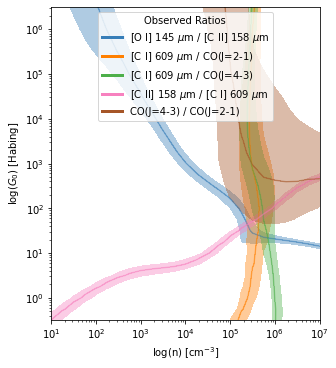

In [69]:
lrf = LineRatioFit(m,aa)
lrf.run()
print(lrf._modelratios.keys())
print(lrf.density,lrf.radiation_field)
par = Parameters()
par.add('density',min=10,max=1E7,value=1E5)
par.add('radiation_field',min=1,max=1E6,value=10)
lrp = LineRatioPlot(lrf)
lrp.overlay_all_ratios()

In [70]:

if True:
    x=residual_single_pix(par,lrf._modelratios,lrf._observedratios)
    print(x)
    len(lrf._modelratios)
    res=minimize(residual_single_pix,params=par,method='leastsq',args=(lrf._modelratios,lrf._observedratios))
    res2=minimize(residual_single_pix,params=par,method='emcee',is_weighted=True,burn=300,steps=5000,args=(lrf._modelratios,lrf._observedratios))
    print(fit_report(res))
    print(fit_report(res2))

  0%|          | 4/5000 [00:00<02:22, 35.05it/s]

[ 1.49335814 -2.82356136 -9.52297844  2.44345703  2.54042291]


100%|██████████| 5000/5000 [02:46<00:00, 30.00it/s]


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 5
    # variables        = 2
    chi-square         = 3.96250529
    reduced chi-square = 1.32083510
    Akaike info crit   = 2.83719280
    Bayesian info crit = 2.05606863
[[Variables]]
    density:          284276.383 +/- 75299.7219 (26.49%) (init = 100000)
    radiation_field:  48.6333049 +/- 11.5285852 (23.71%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(density, radiation_field) =  0.372
[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 500000
    # data points      = 5
    # variables        = 2
    chi-square         = 4.17397206
    reduced chi-square = 1.39132402
    Akaike info crit   = 3.09715101
    Bayesian info crit = 2.31602683
[[Variables]]
    density:          311867.684 +/- 68020.8058 (21.81%) (init = 100000)
    radiation_field:  49.4007442 +/- 10.3267170 (20.90%) (init = 10)
[[Correlations]] (unreported corre

In [76]:
print(fit_report(res),"\n ==========\n")
print(fit_report(res2))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 5
    # variables        = 2
    chi-square         = 3.96250529
    reduced chi-square = 1.32083510
    Akaike info crit   = 2.83719280
    Bayesian info crit = 2.05606863
[[Variables]]
    density:          284276.383 +/- 75299.7219 (26.49%) (init = 100000)
    radiation_field:  48.6333049 +/- 11.5285852 (23.71%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(density, radiation_field) =  0.372 

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 500000
    # data points      = 5
    # variables        = 2
    chi-square         = 4.17397206
    reduced chi-square = 1.39132402
    Akaike info crit   = 3.09715101
    Bayesian info crit = 2.31602683
[[Variables]]
    density:          311867.684 +/- 68020.8058 (21.81%) (init = 100000)
    radiation_field:  49.4007442 +/- 10.3267170 (20.90%) (init = 10)
[[Correlations]] (unreported cor

/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/mpound/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


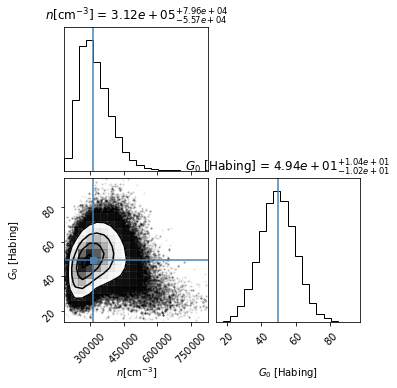

In [75]:
emcee_plot = corner.corner(res2.flatchain, 
                           truths=list(res2.params.valuesdict().values()),
                          show_titles=True,
                           labels=[r"$n [{\rm cm}^{-3}]$",r"$G_0$ [Habing]"],
                           title_fmt='.2e',use_math_text=True,range=[.9995,1])

Habing


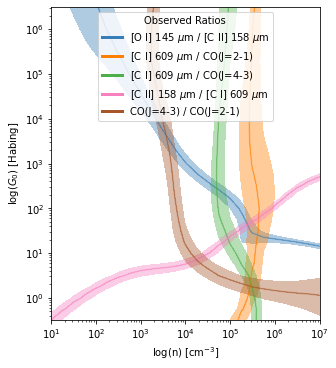

In [54]:
lrp = LineRatioPlot(lrf)
#lrp.chisq()
#np.min(lrf.chisq())
lrp.overlay_all_ratios()

In [ ]:
mp.plot("CI_609",image=True)#measurements=[mx],image=False,legend=True,contours=True,label=True)

In [ ]:
mp.plot("CI_609/FIR",image=True,measurements=[mx],legend=True,label=True)

In [ ]:
#mp.plot("CI_609/FIR",image=True,measurements=[mx,my],legend=True,yaxis_unit=u.erg/(u.second*u.cm*u.cm),label=False)

In [ ]:
l = LineRatioFit(m,[mx])

In [ ]:
p = LineRatioPlot(l)

In [ ]:
l.modelset.supported_ratios.show_in_notebook()

In [ ]:
p.modelintensity("CI_609",measurements=[mx],legend=True,xaxis_unit="m-3",contours=True,label=True)

In [ ]:
identifiers1 = ["OI_63+CII_158/FIR","OI_63/CII_158"]
identifiers2 = ["CO_21","OI_63"]
identifiers3 = ["CO_65","CI_609/CO_43"]

In [ ]:
mp.phasespace(identifiers2,reciprocal=[False,False],dens_clip=[100,1E6]*u.Unit("cm-3"),rad_clip=[1,1E4]*utils._RFS_UNIT_)
#mp.savefig("OI_CO21.png",bbox_inches='tight',facecolor='white')